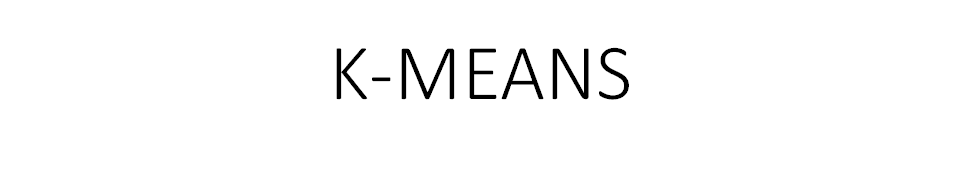

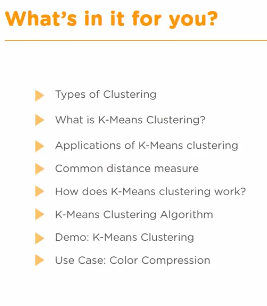

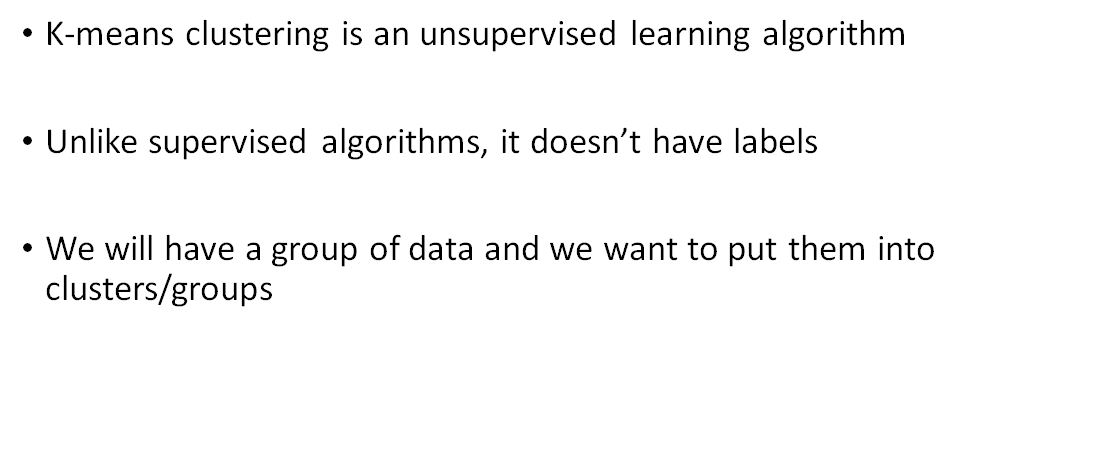

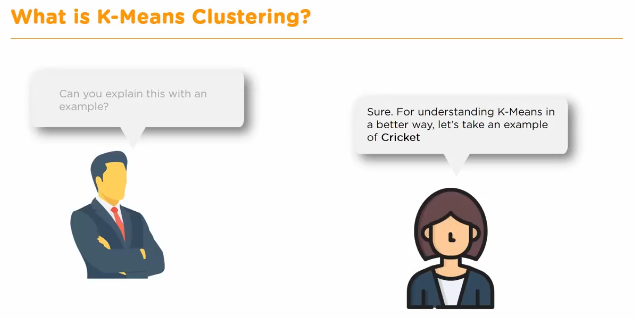

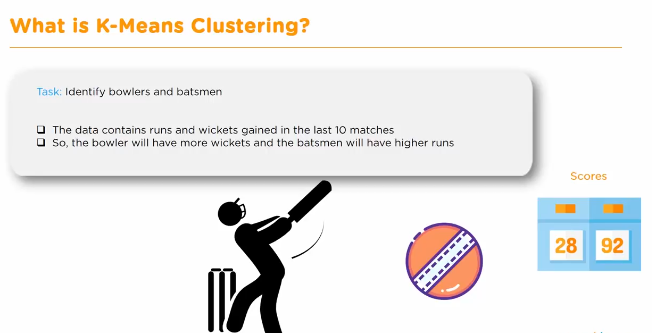

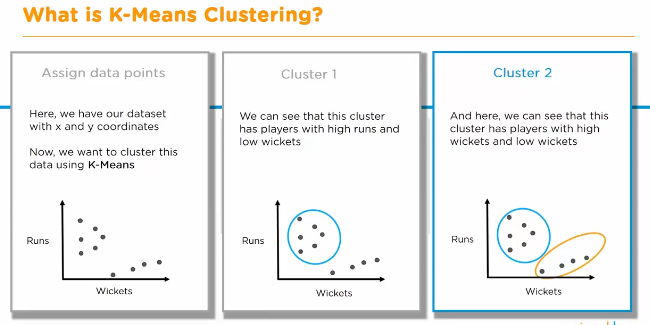

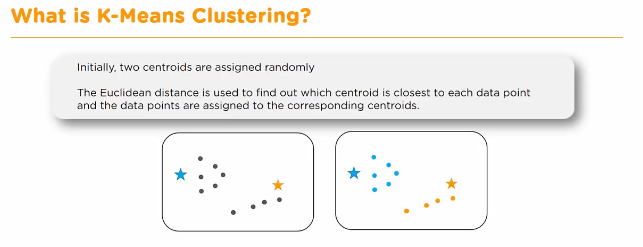

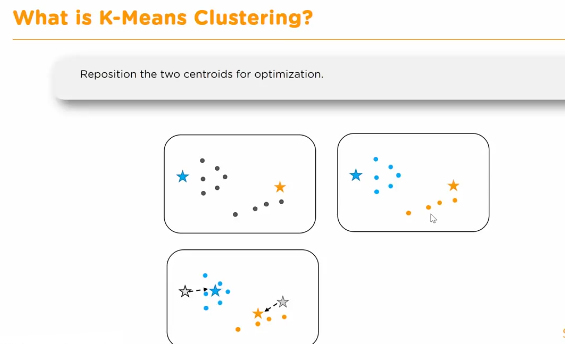

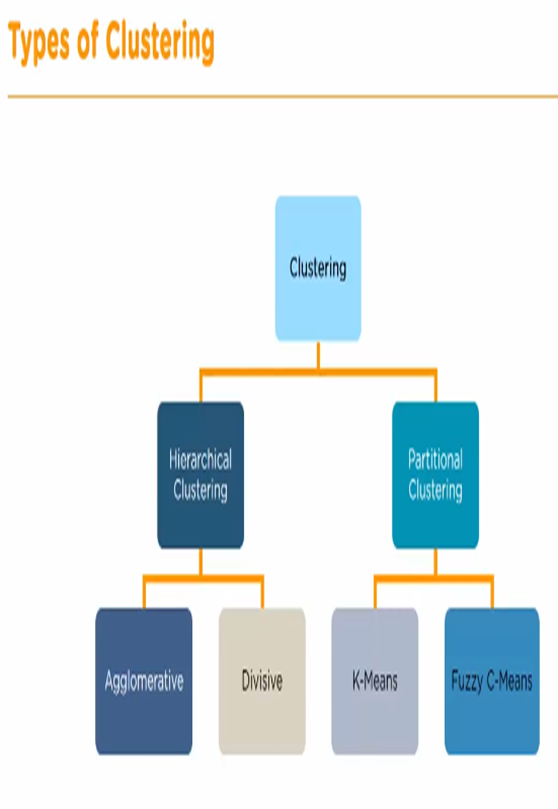

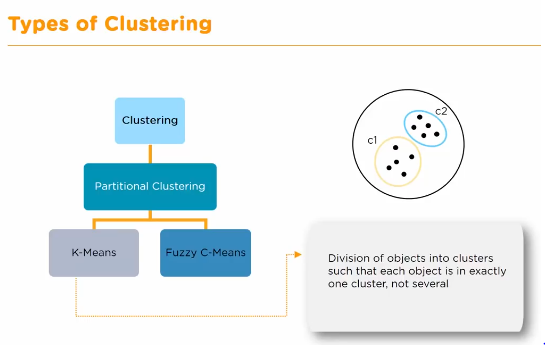

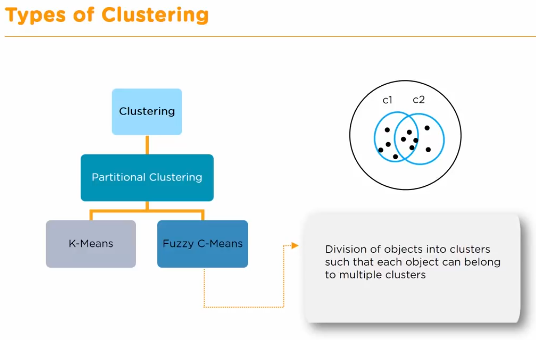

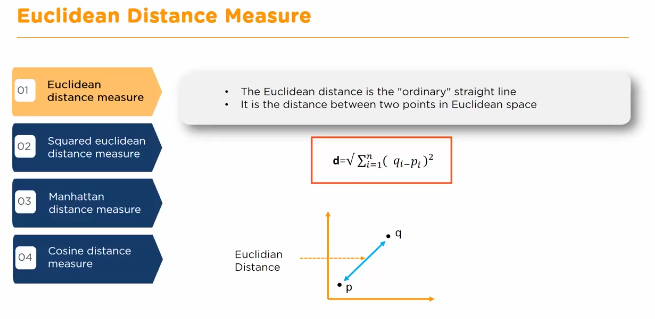

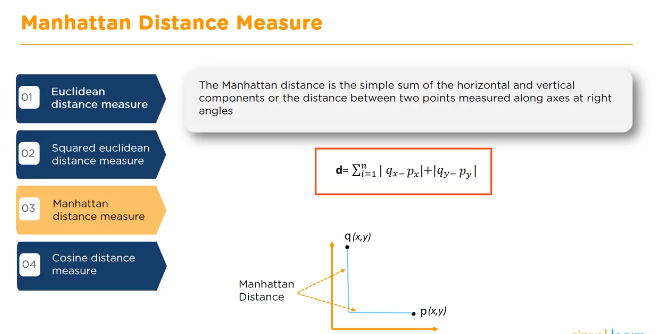

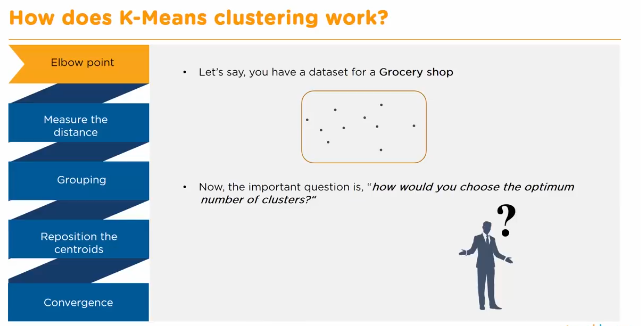

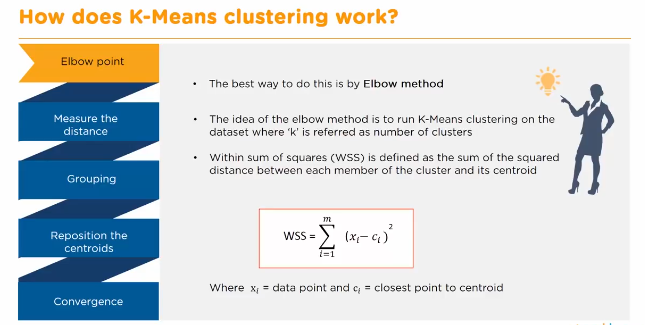

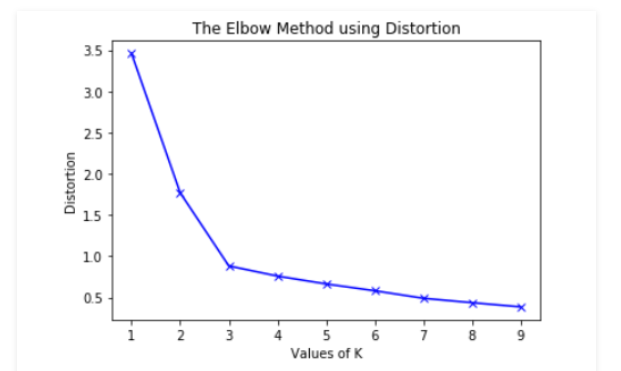

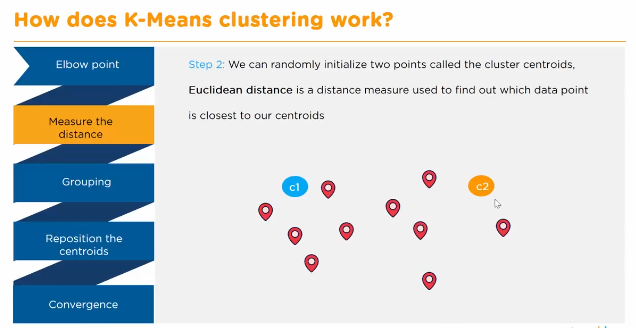

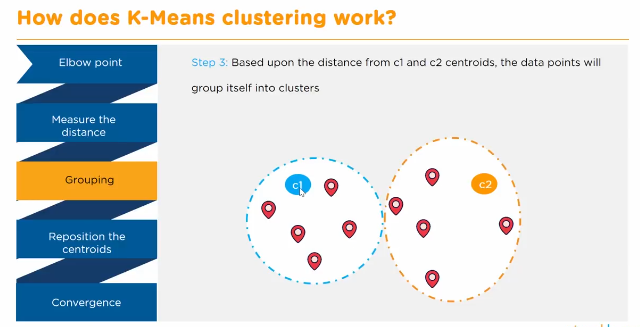

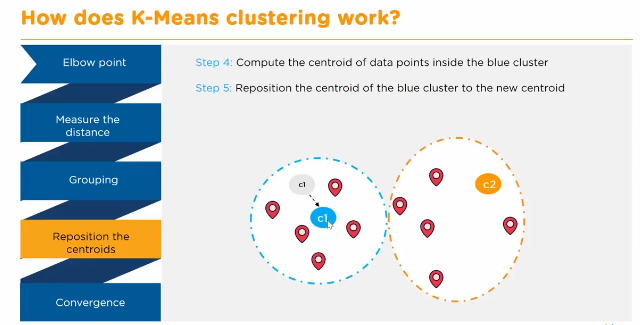

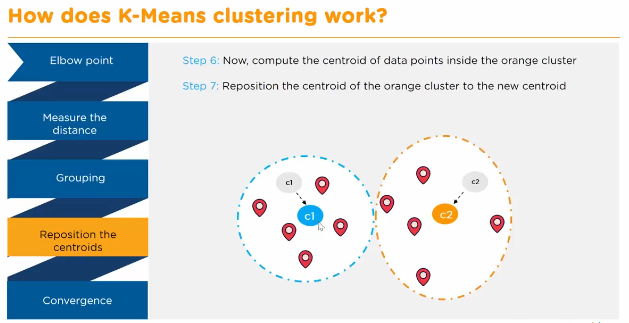

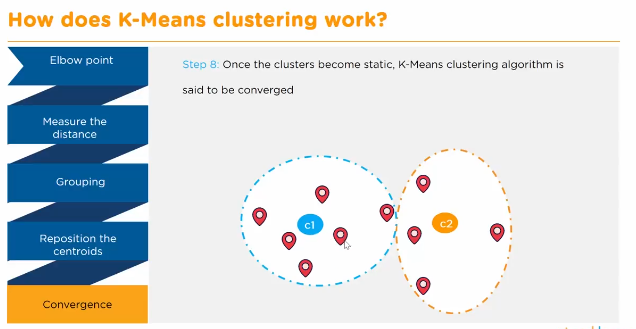

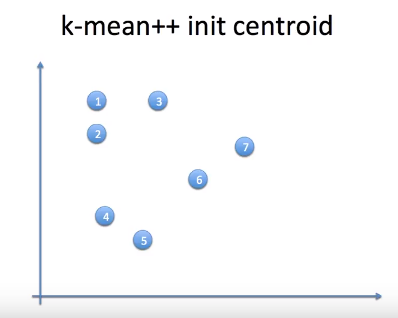

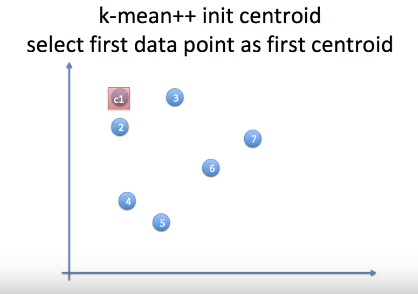

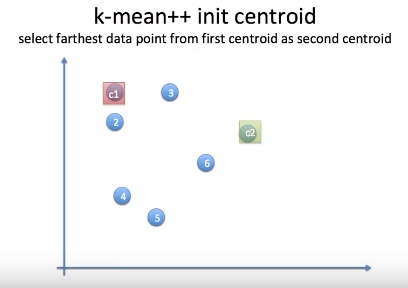

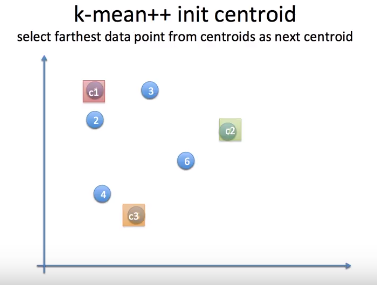

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_excel('Iris_data.xlsx')

In [3]:
df.head(1)

,Unnamed: 0,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0,5.1,3.5,1.4,0.2


In [4]:
df.tail(1)

,Unnamed: 0,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
149,149,5.9,3.0,5.1,1.8


In [5]:
df.columns

Index(['Unnamed: 0', 'sepal length (cm)', 'sepal width (cm)',
       'petal length (cm)', 'petal width (cm)'],
      dtype='object')

In [6]:
df.drop('Unnamed: 0', axis = 1,inplace=True)

In [7]:
df.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2


In [8]:
from sklearn.preprocessing import normalize
data_scaled = normalize(df)

In [9]:
data_scaled

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451],
       [0.80373519, 0.55070744, 0.22325977, 0.02976797],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129],
       [0.82307218, 0.51442011, 0.24006272, 0.01714734],
       [0.8025126 , 0.55989251, 0.20529392, 0.01866308],
       [0.81120865, 0.55945424, 0.16783627, 0.02797271],
       [0.77381111, 0.59732787, 0.2036345 , 0.05430253],
       [0.79428944, 0.57365349, 0.19121783, 0.05883625],
       [0.80327412, 0.55126656,

# Elbow Mthod

**Inertia:** 
 - Inertia tells how far away the points within a cluster are
 - Therefore, a small of inertia is aimed for
 - The range of inertia’s value starts from zero and goes up.

C:\Users\Veeraraju_elluru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Veeraraju_elluru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Veeraraju_elluru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Veeraraju_elluru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMe

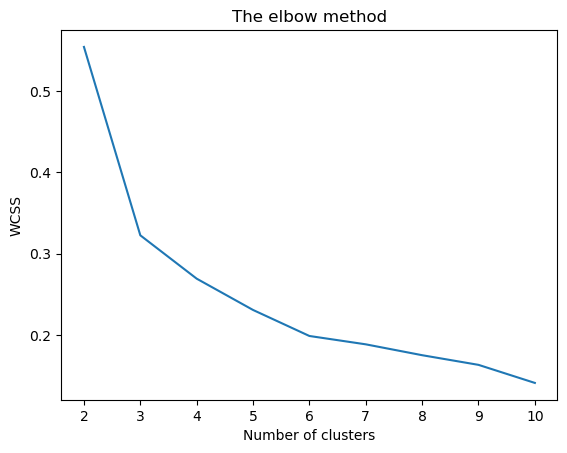

In [10]:
wcss = []

for i in range(2, 11): # [2,3,4,5,6,7,8,9,10]
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(2, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [11]:
col_names = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']

In [12]:
data_scaled = pd.DataFrame(data_scaled, columns = col_names)
data_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.803773,0.551609,0.220644,0.031521
1,0.828133,0.507020,0.236609,0.033801
2,0.805333,0.548312,0.222752,0.034269
3,0.800030,0.539151,0.260879,0.034784
4,0.790965,0.569495,0.221470,0.031639


In [16]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 2, init ='random') # calling the model # 'k-means++'
y_kmeans = kmeans.fit_predict(data_scaled) # predict the values

# cluster centers
centroids = kmeans.cluster_centers_.tolist()
print(f'centroids: {centroids}')
with open('kmeans_centroids.txt', 'w') as f:
    for i in range(len(centroids)):
        for j in range(len(centroids[0])):
            f.write(f'{centroids[i][j]}\n')

centroids: [[0.7265305373146546, 0.33412666623953013, 0.5649710476308757, 0.1920180842845534], [0.8011397898889281, 0.5472692035395327, 0.2344087733130024, 0.039178084094204674]]


C:\Users\Veeraraju_elluru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [23]:
print(data_scaled)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0             0.803773          0.551609           0.220644          0.031521
1             0.828133          0.507020           0.236609          0.033801
2             0.805333          0.548312           0.222752          0.034269
3             0.800030          0.539151           0.260879          0.034784
4             0.790965          0.569495           0.221470          0.031639
..                 ...               ...                ...               ...
145           0.721557          0.323085           0.560015          0.247699
146           0.729654          0.289545           0.579090          0.220054
147           0.716539          0.330710           0.573231          0.220474
148           0.674671          0.369981           0.587616          0.250281
149           0.690259          0.350979           0.596665          0.210588

[150 rows x 4 columns]


In [17]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

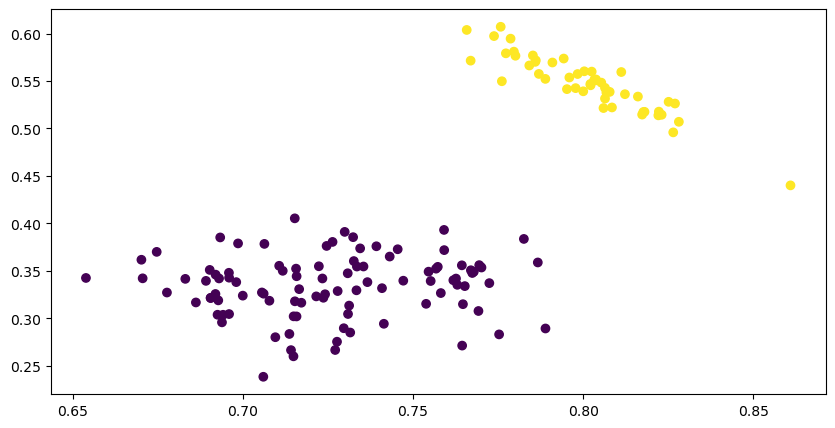

In [18]:
plt.figure(figsize=(10, 5))
plt.scatter(data_scaled['sepal length (cm)'], data_scaled['sepal width (cm)'], c = y_kmeans) 

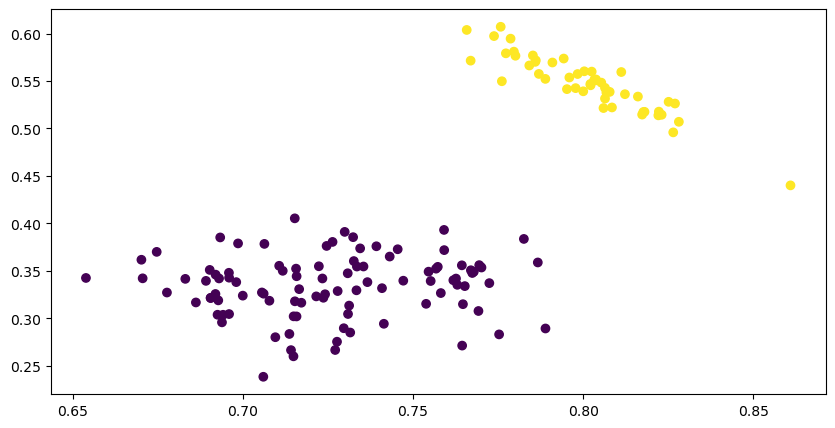

In [19]:
plt.figure(figsize=(10, 5))
plt.scatter(data_scaled['sepal length (cm)'], data_scaled['sepal width (cm)'], c = y_kmeans) 

In [20]:
data_scaled[y_kmeans == 0]  # 0,1,2
# 2 - cluster 3, 66,70,72,83,84, 100 - 149
# 1 - cluster 2, 0 - 49
# 0 - cluster 1, 50 - 99

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
50,0.767011,0.350634,0.514993,0.153402
51,0.745498,0.372749,0.524178,0.174726
52,0.755193,0.339290,0.536296,0.164172
53,0.753849,0.315246,0.548254,0.178183
54,0.758175,0.326599,0.536555,0.174964
...,...,...,...,...
145,0.721557,0.323085,0.560015,0.247699
146,0.729654,0.289545,0.579090,0.220054
147,0.716539,0.330710,0.573231,0.220474
148,0.674671,0.369981,0.587616,0.250281


In [21]:
cluster_0 = data_scaled[y_kmeans == 0]
cluster_0.to_excel('cluster_0.xlsx') # to_csv, .csv

In [22]:
cluster_1 = data_scaled[y_kmeans == 1]
cluster_1.to_excel('cluster_1.xlsx')

In [ ]:
pwd